In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
video = cv.VideoCapture('1.mp4')
ret,frame = video.read()#捕获一帧图像

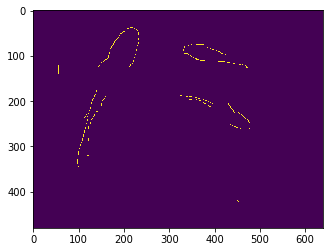

In [29]:
thresh = cv.Canny(frame, 127, 256)
plt.imshow(thresh)
plt.show()

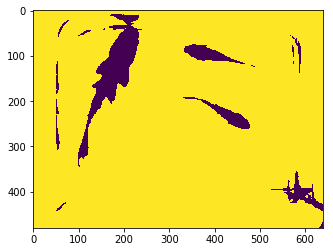

In [3]:
gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
#ret, binary = cv.threshold(gray,90, 255, cv.THRESH_BINARY)
#ret, binary = cv.threshold(gray,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
ret, binary = cv.threshold(gray,90, 255, cv.THRESH_BINARY| cv.THRESH_TRIANGLE)
plt.imshow(binary)
plt.show()

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def draw_min_rect_circle(img, cnts):  # conts = contours
    img = np.copy(img)
    for cnt in cnts:
#         print(cnt.size)
        if(cnt.size<150):
            continue
        min_rect = cv.minAreaRect(cnt)  # min_area_rectangle
        min_rect = np.int0(cv.boxPoints(min_rect))
#         print(min_rect)
        cv.drawContours(img, [min_rect], 0, (0, 255, 0), 2)  # green
    return img
video = cv.VideoCapture('1.mp4')
ret,frame = video.read()#捕获一帧图像
print(ret)
while True:
    ret,frame = video.read()#捕获一帧图像
    gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    #ret, binary = cv.threshold(gray,90, 255, cv.THRESH_BINARY)
    #ret, binary = cv.threshold(gray,0,255,cv.THRESH_BINARY | cv.THRESH_OTSU)
    ret, binary = cv.threshold(gray,0, 255, cv.THRESH_BINARY| cv.THRESH_TRIANGLE)
    thresh, contours, hierarchy = cv.findContours(binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    ret = draw_min_rect_circle(frame, contours)
    cv.imshow("capture", ret)
    if cv.waitKey(100) & 0xFF == ord('q'):
        break
#     plt.imshow(ret)
#     plt.show()
video.release()
cv.destroyAllWindows() 

True
